original


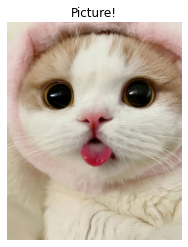

grey


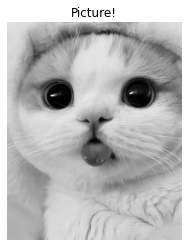

conv


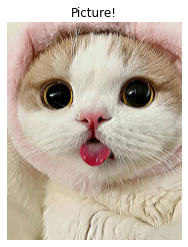

canny edges


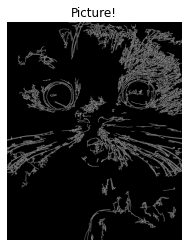

sobel edges


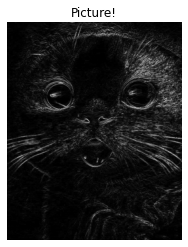

hough


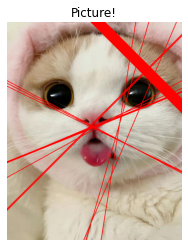

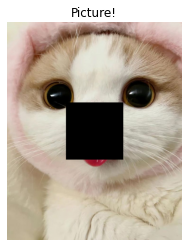

original


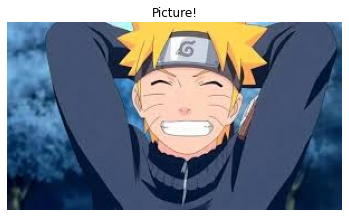

grey


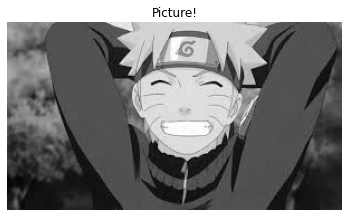

conv


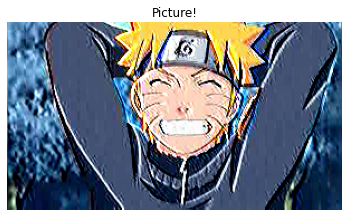

canny edges


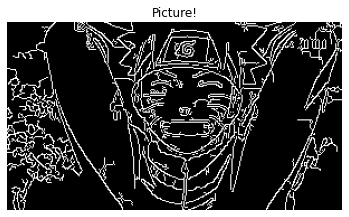

sobel edges


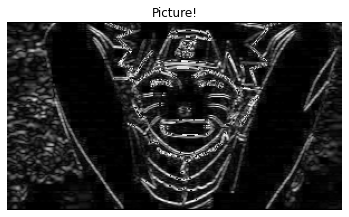

hough


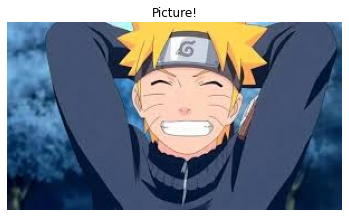

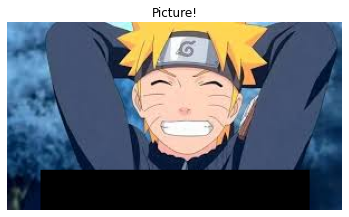

original


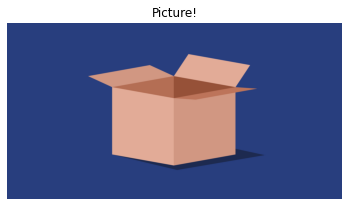

grey


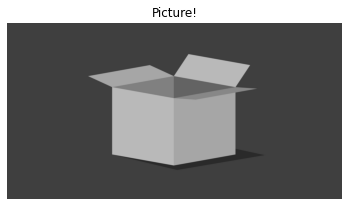

conv


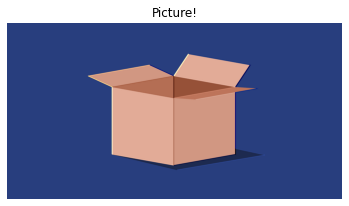

canny edges


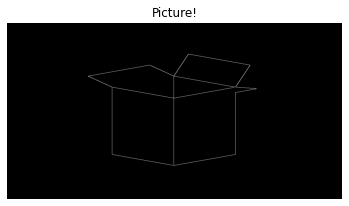

sobel edges


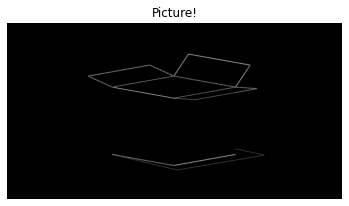

hough


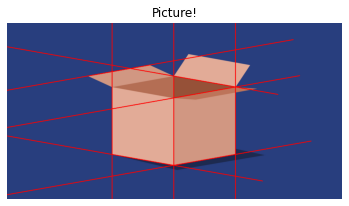

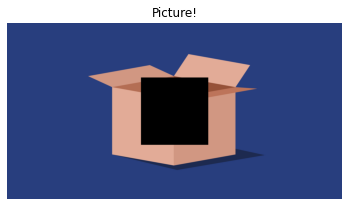

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def displayImage(image):
    cleanImg_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(cleanImg_1)
    plt.title('Picture!')
    plt.axis('off')
    plt.show()


path = "b6a6d50de7eb36065b98ebd254d46cd5.jpg"
def hiii(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    print("original")
    displayImage(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("grey")
    displayImage(gray)

    kernel = np.array([[-1, 2, -1],
                         [-2, 0, 2],
                         [-1, -1, 3]])
    print("conv")
    displayImage(cv2.filter2D(img, -1, kernel))

    canny_edges = cv2.Canny(gray, 0, 200)
    print("canny edges")
    displayImage(canny_edges)

    print("sobel edges")
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobelx, sobely)
    sobel_edges = np.uint8(sobel_edges)
    displayImage(sobel_edges)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    print("hough")
    hough_img = img.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))%
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(hough_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    displayImage(hough_img)
    
    height, width, channels = img.shape
    img[int(height/2)-120:int(height/2)+121, int(width/2)-120:int(width/2)+121] = (0,0,0)
    displayImage(img)

hiii(path)
hiii("images.jpeg")
hiii("og-box-pinhole-projector.png")